# Tarea 2

Miguel Raz y Claudio Pierard

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

----------

#### Pregunta 1
Primero se hace la malla de condiciones iniciales para números complejos:

In [1]:
using PyPlot #Todavía usamos PyPlot, ya que el heatplot en Plots no está muy bien.

In [2]:
"""
    initial_conditions(rango)

Esta función crea una matriz cuadrada de numeros complejos en el rango especificado (rango x rango).

"""


function initial_conditions(rango)
    
    imaginarios = collect(rango)
    reales = collect(rango)
    
    Z_initial = complex(zeros(length(rango), length(rango)))
    
    for j in 1 : length(rango)
        for i in 1 : length(rango)
            
            Z_initial[i,j] = complex(reales[i], imaginarios[j])
            
        end
    end
    
    Z_initial
    
end

initial_conditions (generic function with 1 method)

In [3]:
"""
    iterator(f, X0, n)

Esta función itera n veces todos los valores del arreglo X0 con una función f.
"""


function iterator(f, X0, n)
    
    for t in 1:n
        for i in 1:length(X0[:,1])
            for j in 1:length(X0[1,:])
                
                X0[i,j] = f(X0[i,j])
              
                if isnan(X0[i,j]) == true
                    
                   X0[i,j] = 0
                    
                end
                
            end
        end
    end
    
    X0
    
end

iterator (generic function with 1 method)

In [4]:
f(z) = z^2 + complex(0.12256484161600012, 0.74486407104)

f (generic function with 1 method)

In [5]:
isnan(NaN+NaN*im) && 0 #Comentario de Luis: Se pueden filtar los valores NaN, tal vez eso ayude.

0

In [6]:
Z0 = initial_conditions(-1:1/128:1)
Zf = iterator(f, Z0, 10000)

257x257 Array{Complex{Float64},2}:
    -28248.5+21408.0im     …      11.1215+7.98946im   
    -28248.5+21408.0im            3.47631+1.042im     
    -28248.5+21408.0im            3.47631+1.042im     
    -28248.5+21408.0im            3.47631+1.042im     
    -28248.5+21408.0im            3.47631+1.042im     
    -28248.5+21408.0im     …     -1.83312-0.0810455im 
    -28248.5+21408.0im          -0.289176+1.42804im   
    -28248.5+21408.0im          -0.289176+1.42804im   
    -28248.5+21408.0im        -1.34749e18-8.21661e17im
    -28248.5+21408.0im          -0.563518-0.029068im  
    -28248.5+21408.0im     …     0.439272+0.777625im  
    -28248.5+21408.0im           0.439272+0.777625im  
    -28248.5+21408.0im           0.439272+0.777625im  
            ⋮              ⋱                          
    0.439272+0.777625im    …     -28248.5+21408.0im   
    0.439272+0.777625im          -28248.5+21408.0im   
   -0.563518-0.029068im          -28248.5+21408.0im   
 -1.34749e18-8.21661e17im     

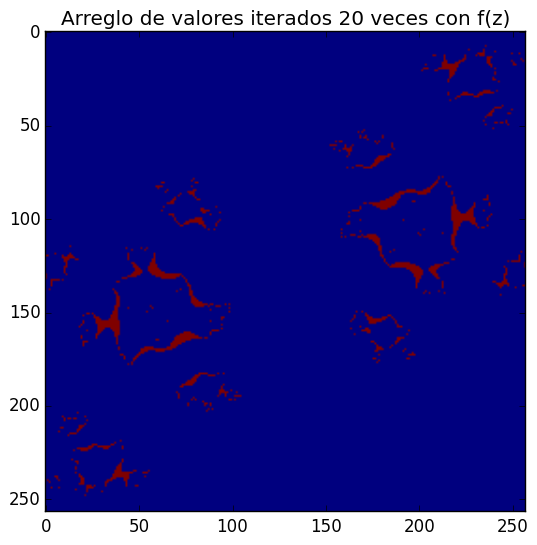

PyObject <matplotlib.text.Text object at 0x7f849b6af290>

In [7]:
imshow(imag(Zf))
title("Arreglo de valores iterados 20 veces con f(z)")

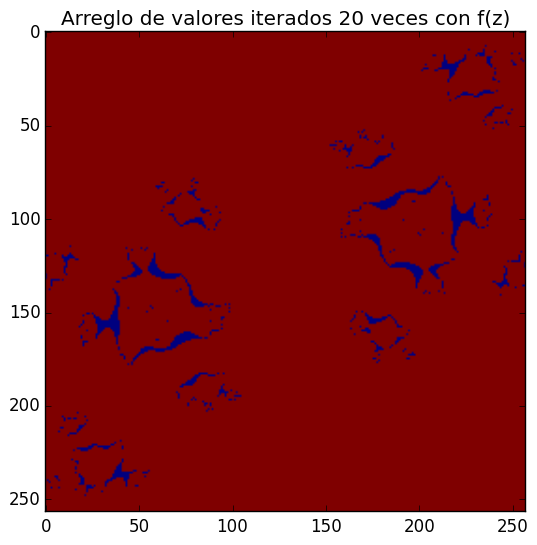

PyObject <matplotlib.text.Text object at 0x7f849b602a90>

In [8]:
Z_ri = real(Zf) .- imag(Zf)
imshow(Z_ri)
title("Arreglo de valores iterados 20 veces con f(z)")

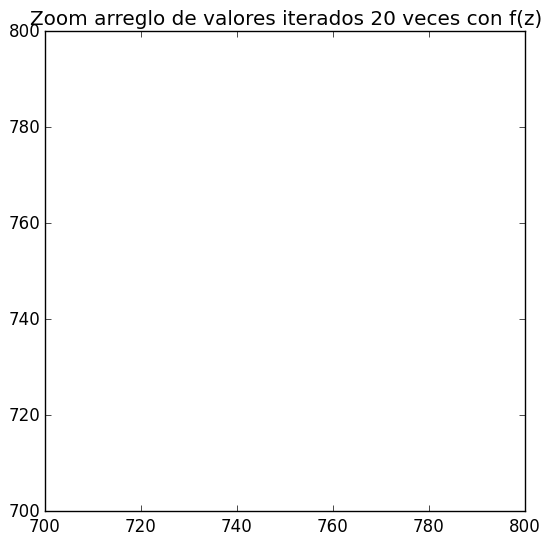

PyObject <matplotlib.text.Text object at 0x7f849b4d4b10>

In [9]:
imshow(imag(Zf))
ylim(700,800)
xlim(700,800)
title("Zoom arreglo de valores iterados 20 veces con f(z)")

**Observaciones:** Al iterar más de 20 veces la función f, con un conjunto de condiciones iniciales complejas en $[-1,1]\times [-1,1]$, todos los valores divergen. 

- Sólo iterarlo un número $n < 20$, antes que que todo diverja.
- Buscar otra forma de graficarlo.

#### Pregunta 2

In [10]:
function compute_roots(f, f´, range)
    initial_conditions = range
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 1 method)

In [11]:
#g(x) = 2x%1 #Mapeo
g(x) = 2*x < 1 ? 2*x : 2*x-1
dg(x) = 2

dg (generic function with 1 method)

Definiendo un arreglo de condiciones iniciales:

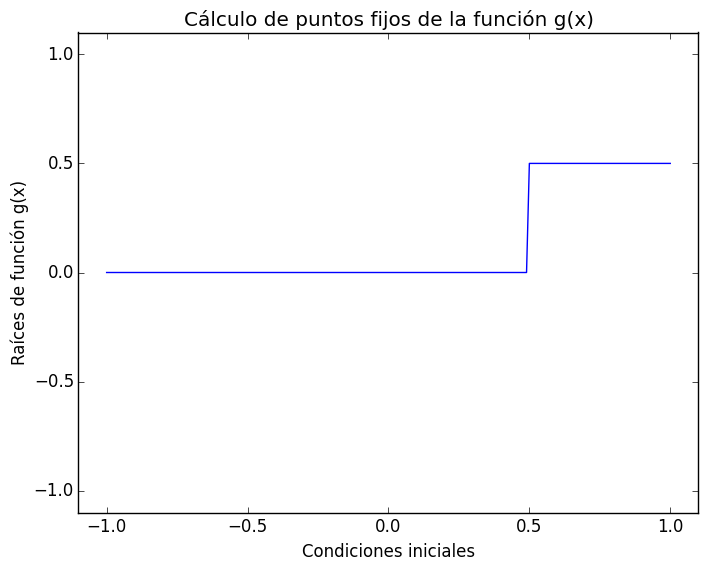

PyObject <matplotlib.text.Text object at 0x7f849b480410>

In [12]:
mirango = -1:0.01:1
groots = compute_roots(g, dg, -1:0.01:1)
plot(mirango, groots)
ylim(-1.1, 1.1)
xlim(-1.1, 1.1)

xlabel("Condiciones iniciales")
ylabel("Raíces de función g(x)")
title("Cálculo de puntos fijos de la función g(x)")

**Observaciones:** Para valores iniciales en el intervalo $[-1,1]$, los puntos fijos son $-0.5$, $0$ y $0.5$.

In [13]:
function mapeos(f, X0, n)
    
    x_solution = zeros(eltype(X0), length(X0), n)   #Estoy considerando a X0 como un array de 1 x n dimensiones.
    x_solution[:, 1] = X0
    
    for t in 2:n
        for i in 1:length(X0)
        
            x_solution[i,t] = f(x_solution[i, t-1])
            
        end
        
    end
    
    x_solution
    
end

mapeos (generic function with 1 method)

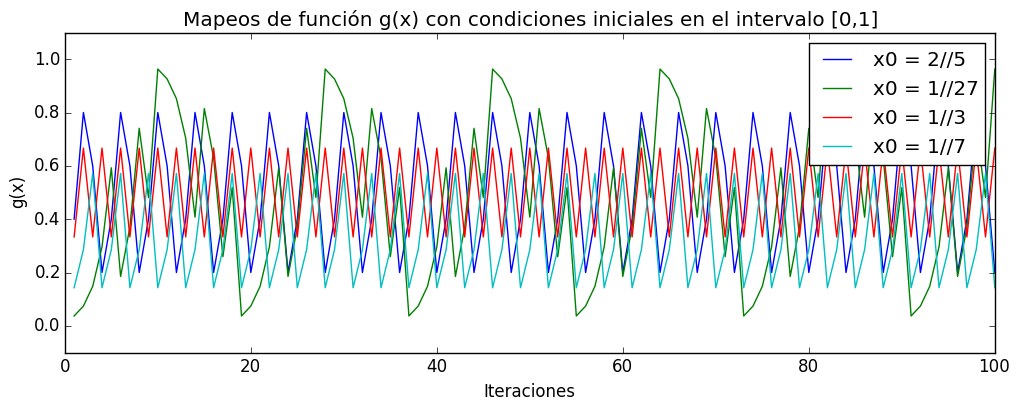

PyObject <matplotlib.legend.Legend object at 0x7f8498ea52d0>

In [23]:
t = collect(1:100)
#X0 = collect(0.1:0.1:1)
X0=[2//5, 1//27, 1//3, 1//7]
Xf = mapeos(g, X0, 100)

figure(figsize=(12,4))

for i in 1:length(Xf[:,1])
    etiqueta = Xf[i,1]
    plot(t, Xf[i,:]', label=("x0 = $etiqueta"))
    #plot(t, Xf[i,:]', "-.")
    
end

#plot(t, Xf[5,:]', label=("x0 = 0.5"))
#plot(Xf[:,:], label=("x0 = 0.5"))

ylim(-0.1, 1.1)
xlabel("Iteraciones")
ylabel("g(x)")
title("Mapeos de función g(x) con condiciones iniciales en el intervalo [0,1]")
legend()

In [15]:
Xf #Comentario de Luis: Checar que con números racionales como condiciones iniciales, las orbitas no converjen a cero 
#cuando n>64.

2x100 Array{Rational{Int64},2}:
 2//5   4//5   3//5   1//5    2//5   4//5   …   2//5    4//5    3//5    1//5 
 1//27  2//27  4//27  8//27  16//27  5//27     10//27  20//27  13//27  26//27